In [1]:
# Import packages & setup dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funky import extractor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# names=['ID', 'M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed','kick','Mrem', 'Srem', 'esca_v', 'Mcluster', 'gen']
df_gc = extractor('gc')
df_nsc = extractor('nsc')
df_ysc = extractor('ysc')

In [22]:
max_evo = df_nsc.loc[df_nsc.groupby('ID')['gen'].idxmax()]

In [23]:
# separate test set, create label set
selected_features = ['t_elapsed', 't_pair', 'esca_v', 'Z']
nsc_train, nsc_test, escaped_train, escaped_test = train_test_split(max_evo[selected_features], max_evo['gen'], test_size=0.2)


forest = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=1758, n_jobs=-1, class_weight='balanced')

#search = GridSearchCV(forest, {'max_depth':[3, 10, 30]}, verbose=4)
#search.fit(gc_train, escaped_train)

In [25]:
forest.fit(nsc_train, escaped_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=20,
                       n_jobs=-1, random_state=1758)

In [7]:
#(forbest := search.best_estimator_).fit(gc_test, escaped_test)

NameError: name 'search' is not defined

In [28]:
print(forest.score(nsc_test, escaped_test))

0.8219623749617095


In [29]:
importances = pd.Series(forest.feature_importances_, index=list(df_nsc[selected_features]))

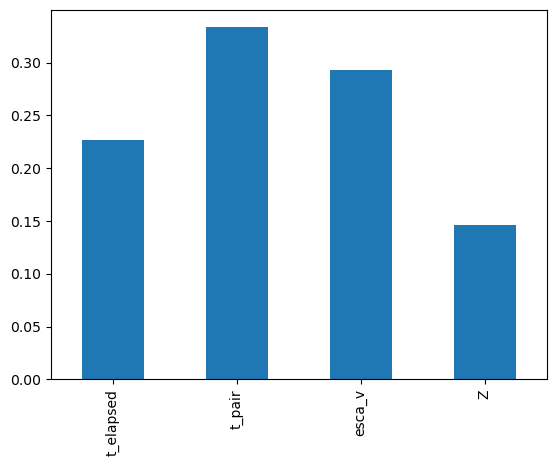

In [30]:
importances.plot.bar()
plt.show()

# Grafici

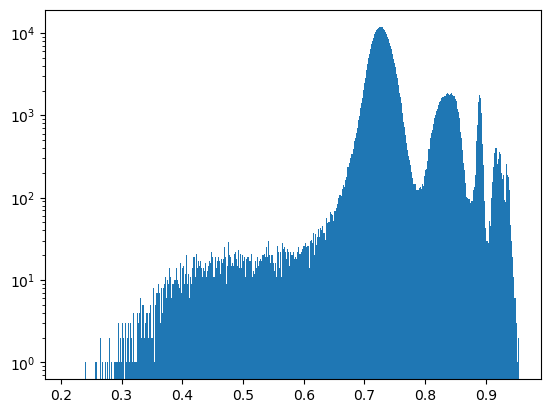

In [32]:
plt.hist(max_evo['S1'], 'auto')
plt.yscale('log')
plt.show()

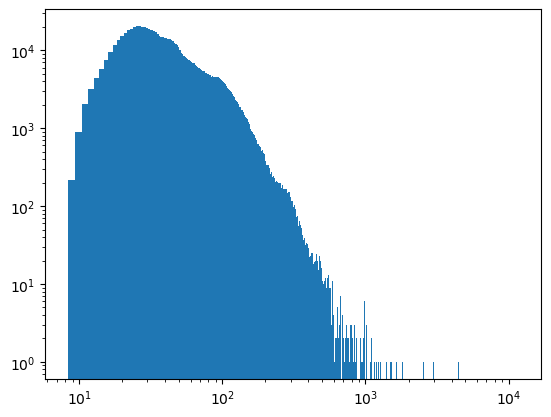

In [34]:
plt.hist(max_evo['Mrem'], 'auto')
plt.xscale('log')
plt.yscale('log')
plt.show()

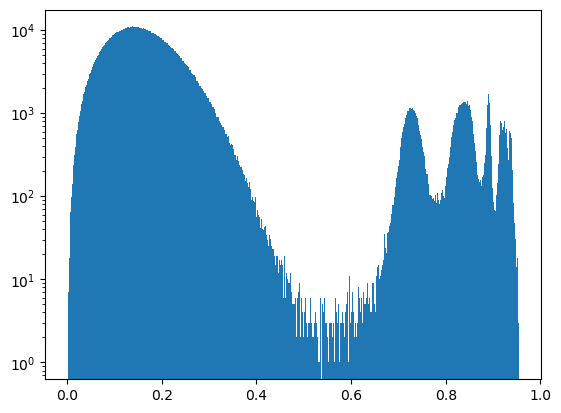

In [33]:
plt.hist(max_evo['S2'], 'auto')
plt.yscale('log')
plt.show()

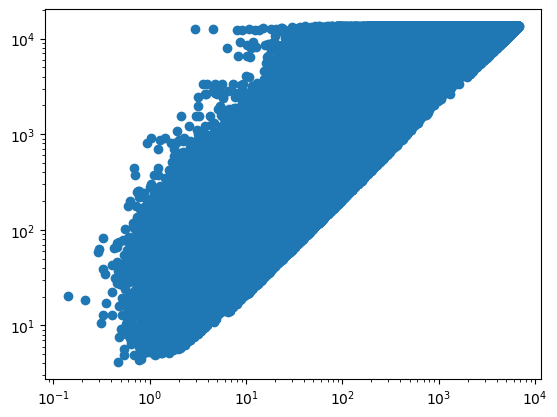

In [26]:
plt.scatter(df_nsc['t_pair'], df_nsc['t_elapsed'])
plt.xscale('log')
plt.yscale('log')
plt.show()

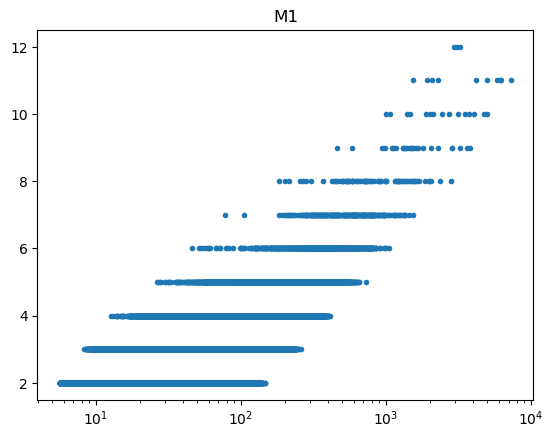

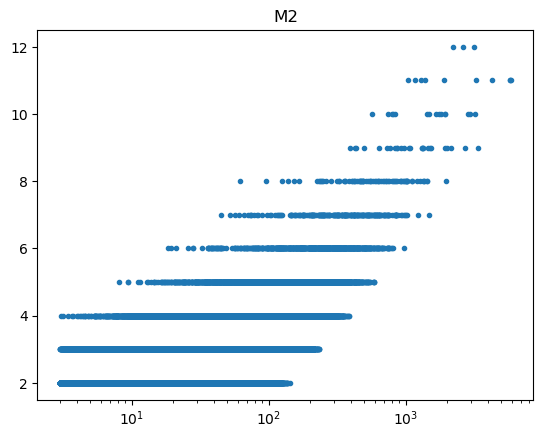

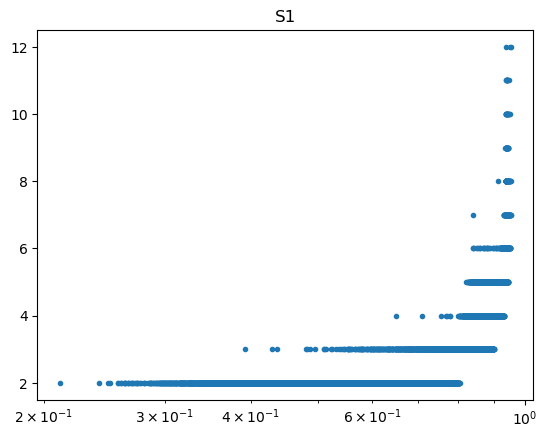

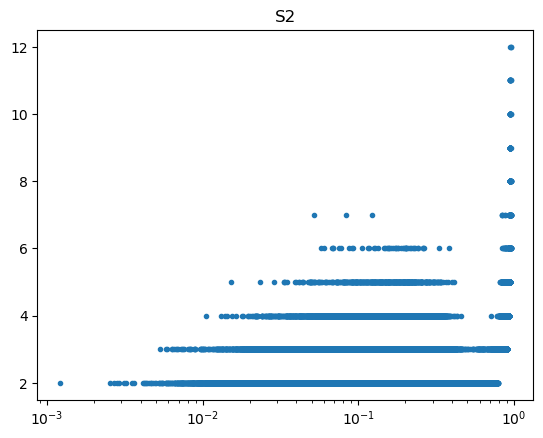

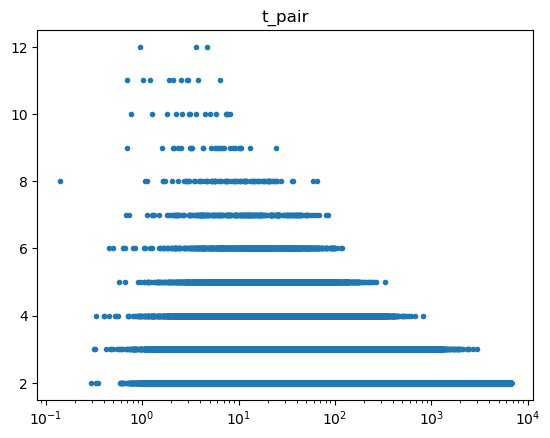

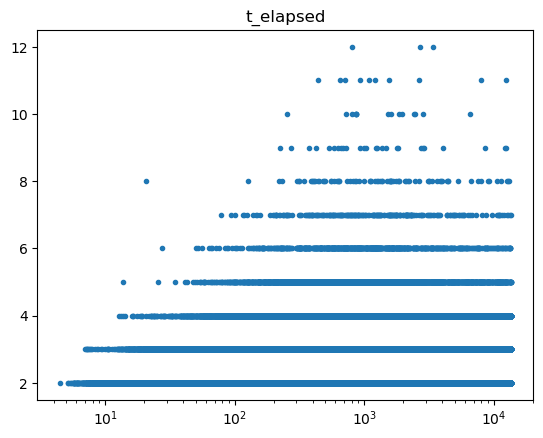

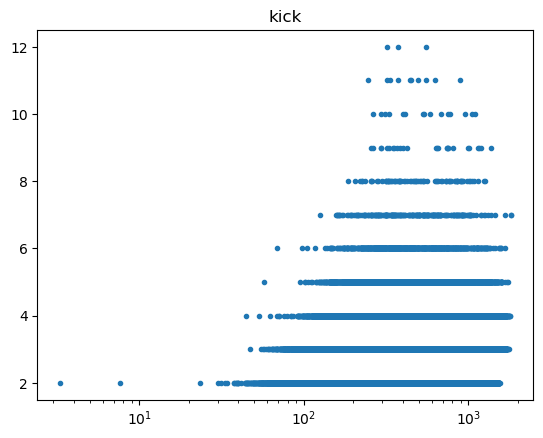

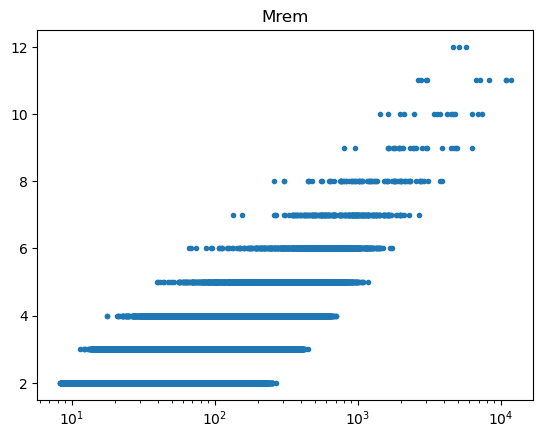

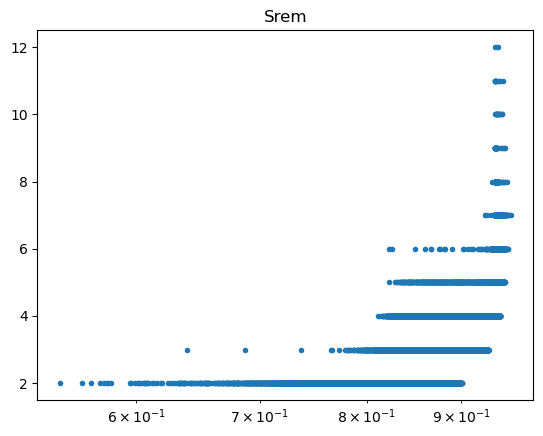

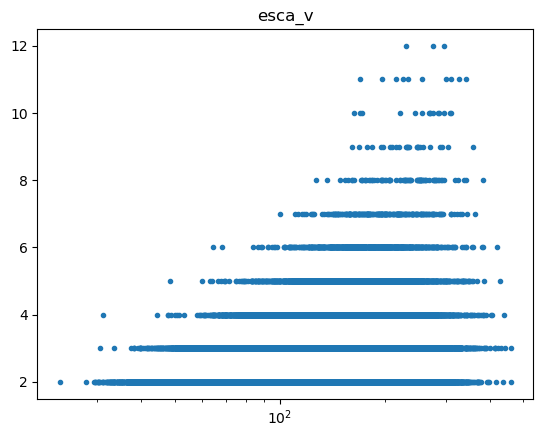

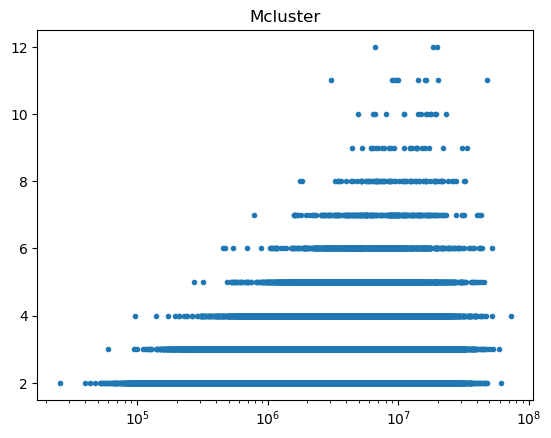

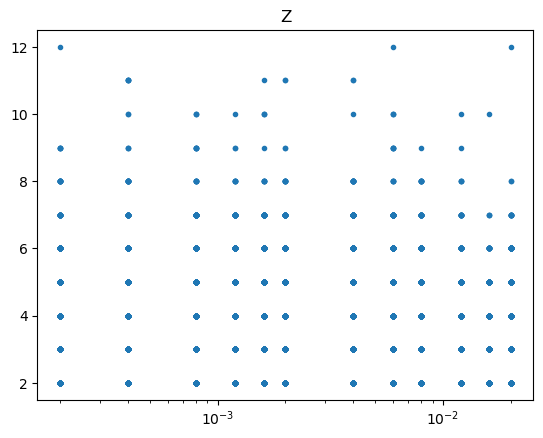

In [36]:
selected_feat = ['M1', 'M2', 'S1', 'S2', 't_pair', 't_elapsed','kick','Mrem', 'Srem', 'esca_v', 'Mcluster', 'Z']

for feat in selected_feat:# un plot per selected
    plt.xscale('log') 
    plt.scatter(max_evo[feat], max_evo['gen'],marker='.')
    plt.title(feat)
    plt.show()

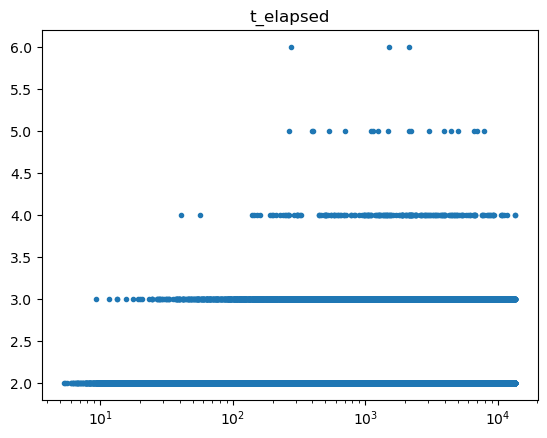

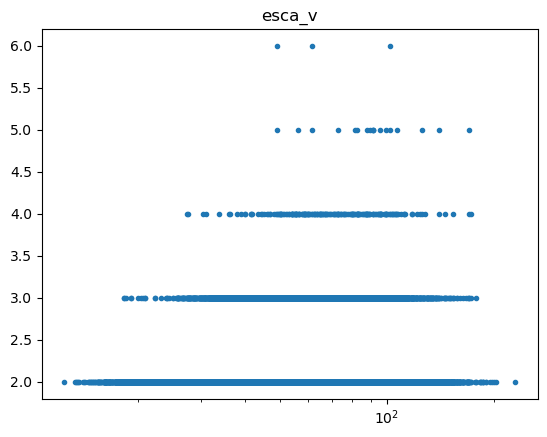

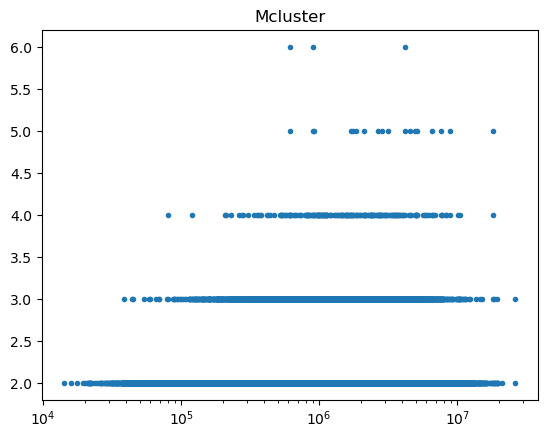

In [25]:
selected_feat = ['t_elapsed', 'esca_v', 'Mcluster']

for feat in selected_feat:# un plot per selected
    plt.xscale('log') 
    plt.scatter(df_gc[feat], df_gc['gen'],marker='.')
    plt.title(feat)
    plt.show()

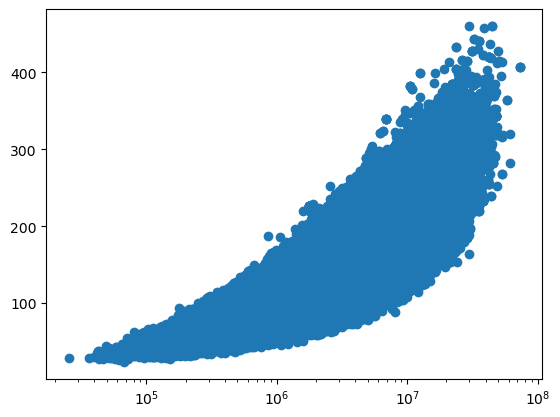

In [24]:
plt.scatter(df_nsc['Mcluster'], df_nsc['esca_v'])
plt.xscale('log')
plt.show()